<a href="https://colab.research.google.com/github/maddara88/Deep_Learning_Project_Work/blob/main/VGG_Transfer_Learning(dogs_vs_cats).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# VGG as an independent model - 
# Can I use VGG for Dogs-Vs-Cats ? No, as ImageNet never had a broad category called Cat or Dog

# We will create a model for Dog & Cat ONLY, but we will use VGG for calculating feature . . . 

In [ ]:
# Any typical CNN model is made up of 2 parts - 
# 1. Conv Layers - where it finds features (ROI) 
# 2. Cat Layers - where these features are further divided in to categories

In [ ]:
# We will not train our Conv Layer from scratch, we will use VGG's Conv Layer and
# then add custom Cat layers

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf

In [42]:
#now we are going to import vgg conv part

In [43]:
vgg16 = tf.keras.applications.vgg16.VGG16(include_top = False,input_shape = (150,150,3))

In [44]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [45]:
print(vgg16.input_shape)
print(vgg16.output_shape)

(None, 150, 150, 3)
(None, 4, 4, 512)


In [46]:
image = cv2.cvtColor(cv2.imread("wolf.jpg"), cv2.COLOR_BGR2RGB)
image = cv2.resize(image,(150,150))

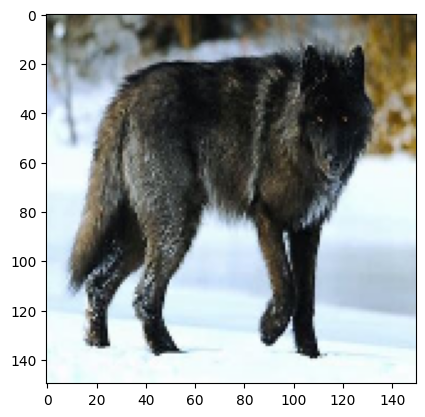

In [47]:
plt.imshow(image)

In [48]:
image = tf.keras.applications.vgg16.preprocess_input(image)
image = np.expand_dims(image,axis = 0)

In [49]:
image.shape

(1, 150, 150, 3)

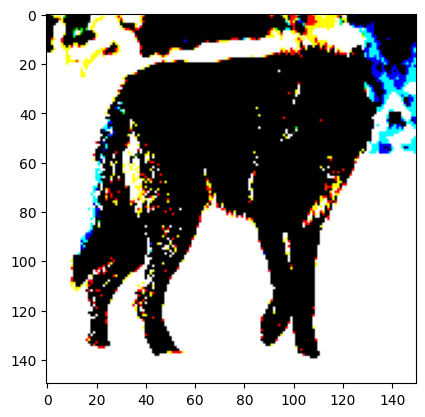

In [50]:
plt.imshow(image[0])

In [51]:
features = vgg16.predict(image)

1/1 [==============================] - 0s 130ms/step


In [52]:
features.shape

(1, 4, 4, 512)

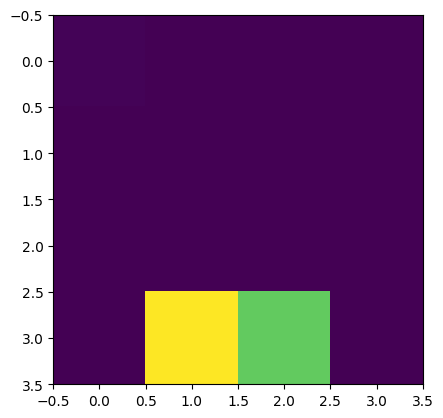

In [53]:
plt.imshow(features[0,:,:,500])

In [54]:
features[0,:,:,500]

array([[ 0.49048382,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , 49.846355  , 37.955536  ,  0.        ]],
      dtype=float32)

In [55]:
#here we would not be doing backpropagatin on the conv layer as it has been well constructed that while we are doing 
#backpropagation on the cat layer we we can get to identify the losses more clearly and can diffrentiate betweeen  cats and dogs 
# in a much better manner 

In [56]:
# Freeze the Conv Layers of VGG! Freeze = Parameters of that layer wont be optimized while BP
# By default all layers trainable = True

In [57]:
for layers in vgg16.layers:
  layers.trainable = False
  print(layers.name, layers.trainable)


input_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [58]:
#cat layer

In [59]:
flat = tf.keras.layers.Flatten(name = "Flatten_layer") (vgg16.output)
dense = tf.keras.layers.Dense(64,activation = "relu", name = "Dense_Layer") (flat)
output = tf.keras.layers.Dense(2,activation = "softmax", name = "Output_layer") (dense)

In [60]:
final_model = tf.keras.models.Model(inputs = [vgg16.input], outputs = [output])

In [61]:
final_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   

In [62]:
for layers in final_model.layers:
  print(layers.name, layers.trainable)

input_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False
Flatten_layer True
Dense_Layer True
Output_layer True


In [63]:
#Now lets import our dataset

In [64]:
import kaggle

In [65]:
!mv kaggle.json /root/.kaggle/

In [66]:
import kaggle

In [67]:
! kaggle competitions download -c dogs-vs-cats

 99% 808M/812M [00:20<00:00, 43.4MB/s]
100% 812M/812M [00:20<00:00, 41.7MB/s]


In [68]:
!unzip -q dogs-vs-cats.zip

In [69]:
!unzip -q train.zip

In [70]:
idg = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split = 0.1, preprocessing_function = tf.keras.applications.vgg16.preprocess_input
)

In [71]:
data = pd.DataFrame(columns = ["filename","Label"])
data["filename"] = os.listdir("train/")
data["Label"] = data.filename.str.split(".",expand = True)[0]

In [72]:
data.sample(5)

,filename,Label
19882,cat.5418.jpg,cat
13473,dog.11981.jpg,dog
21851,cat.12256.jpg,cat
14396,cat.11347.jpg,cat
7997,cat.9523.jpg,cat


In [73]:
train_idg = idg.flow_from_dataframe(dataframe = data,directory="train/",x_col = "filename",y_col = "Label",
                                    target_size = (150,150),batch_size = 64,subet = "training")



Found 25000 validated image filenames belonging to 2 classes.


In [74]:
val_idg = idg.flow_from_dataframe(dataframe = data,directory = "train/",x_col = "filename",y_col = "Label",
                                  target_size = (150,150),batch_size = 64,subset = "validation")


Found 2500 validated image filenames belonging to 2 classes.


In [75]:
final_model.compile(tf.keras.optimizers.SGD(),loss = tf.keras.losses.categorical_crossentropy,metrics = ["acc"])

In [76]:
final_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   

In [77]:
final_model_history = final_model.fit(train_idg,validation_data = val_idg,epochs = 10,batch_size = 64)

Epoch 1/10
391/391 [==============================] - 112s 267ms/step - loss: 6.1524 - acc: 0.9436 - val_loss: 0.0611 - val_acc: 0.9780
Epoch 2/10
391/391 [==============================] - 98s 250ms/step - loss: 0.0683 - acc: 0.9750 - val_loss: 0.0429 - val_acc: 0.9852
Epoch 3/10
391/391 [==============================] - 99s 253ms/step - loss: 0.0493 - acc: 0.9809 - val_loss: 0.0367 - val_acc: 0.9856
Epoch 4/10
391/391 [==============================] - 99s 254ms/step - loss: 0.0359 - acc: 0.9856 - val_loss: 0.0351 - val_acc: 0.9876
Epoch 5/10
391/391 [==============================] - 99s 252ms/step - loss: 0.0273 - acc: 0.9887 - val_loss: 0.0139 - val_acc: 0.9936
Epoch 6/10
391/391 [==============================] - 98s 252ms/step - loss: 0.0200 - acc: 0.9916 - val_loss: 0.0160 - val_acc: 0.9912
Epoch 7/10
391/391 [==============================] - 98s 251ms/step - loss: 0.0155 - acc: 0.9930 - val_loss: 0.0121 - val_acc: 0.9936
Epoch 8/10
291/391 [=====================>........] - 

KeyboardInterrupt: ignored

In [78]:
! nvidia-smi

Fri Apr  7 12:33:33 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    29W /  70W |   9255MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [79]:
final_model.output.shape

TensorShape([None, 2])

In [86]:
image2 = cv2.cvtColor(cv2.imread("cat.jpg"),cv2.COLOR_BGR2RGB)
image2 = cv2.resize(image2,(150,150))
image2 = tf.keras.applications.vgg16.preprocess_input(image2)
image2 = np.expand_dims(image2,axis = 0)

In [87]:
image2.shape

(1, 150, 150, 3)

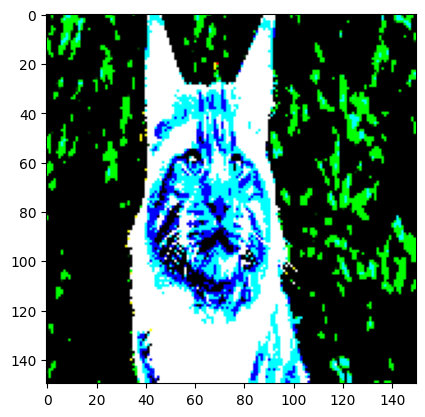

In [89]:
plt.imshow(image2[0])

In [90]:
result = final_model.predict(image2)

1/1 [==============================] - 0s 230ms/step


In [101]:
result

array([[1., 0.]], dtype=float32)

In [93]:
np.argmax(result)

0

In [94]:
pet = {0:"cat",1:"dog"}

In [96]:
pet[0] # so here we got cat and its a cat so our model predicted right

'cat'

In [97]:
# lets now create a function for the above

100.0

In [110]:
def predict(x):
  image2 = cv2.cvtColor(cv2.imread(x),cv2.COLOR_BGR2RGB)
  image2 = cv2.resize(image2,(150,150))
  plt.imshow(image2)
  image2 = tf.keras.applications.vgg16.preprocess_input(image2)
  image2 = np.expand_dims(image2,axis = 0)
  result = final_model.predict(image2)
  print(f"hello sir im {np.max((np.round(result,2))*100)}% sure that the picture provided by you is a {pet[np.argmax(result)]}")

1/1 [==============================] - 0s 22ms/step
hello sir im 100.0% sure that the picture provided by you is a cat


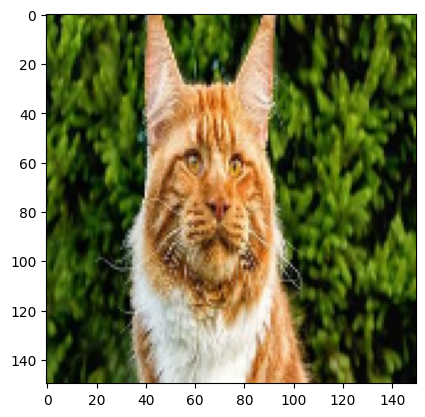

In [111]:
predict("cat.jpg")

1/1 [==============================] - 0s 31ms/step
hello sir im 100.0% sure that the picture provided by you is a dog


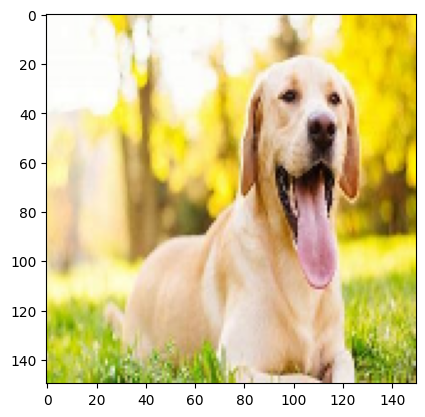

In [112]:
predict("dog.jpg")